In [41]:
# %%
# create method to numerically find intersecton point like Andews's code
# set up pipeline similar to quantum chemistry and think about use
import importlib
import quantum_api as qes
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from quantum_api import QuantumEconAnalysis, QuantumEconConfig


importlib.reload(qes)

<module 'quantum_api' from '/Users/hansgundlach/Documents/MITresearch/QuantumWork/quantum_api.py'>

In [42]:
# %%
# config = {
#     "year": 2024,
#     "penalty": "log(n, 2)",
#     "hardware_slowdown": 10**3.78,
#     "quantum_improvement_rate": 0.1,
#     "prob_size_intersect_range": (2, 1e2),
#     "physical_to_logical_ratio": 10**3,
#     "physical_to_logical_improvement": 0.02,
#     "extrapolation_type":"exponential",
#     "logical_to_problem_size":"q",
#     "roadmap": {
#         2020: 27,
#         2022: 127,
#         2024: 133,
#         2025: 156,
#         2029: 200,
#         2033: 2000,
#     },
# }

#put in all config parameters above
config = QuantumEconConfig(
    start_year=2024,
    penalty="log(n, 2)",
    hardware_slowdown=10**3.78,
    quantum_improvement_rate=0.1,
    prob_size_intersect_range=(2, 1e2),
    physical_to_logical_ratio=10**3,
    physical_to_logical_improvement=0.02,
    extrapolation_type="exponential",
    logical_to_problem_size="q",
    roadmap={
        2020: 27,
        2022: 127,
        2024: 133,
        2025: 156,
        2029: 200,
        2033: 2000,
    },
)

# classical_runtime = "n**3"
# quantum_runtime = "n"
classical_runtime = "n**n*sqrt(2*3.1415*n)*exp(-n)"
quantum_runtime = "n**5"

qea = QuantumEconAnalysis(config=config)
# basic functionality presentation
# economic advantage year

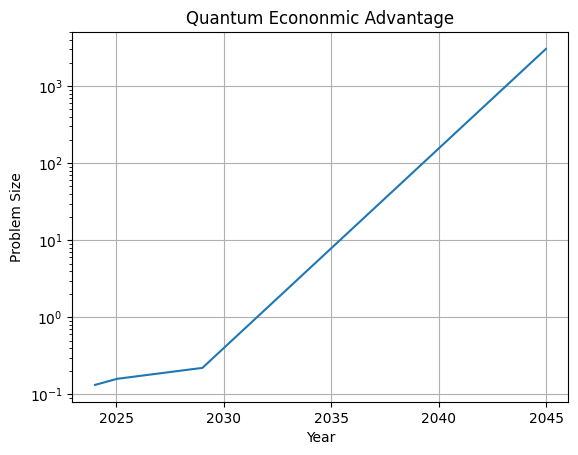

In [43]:
#plot  feasible problem over time
qea.plot_feasible_problem(stop_year=2045)

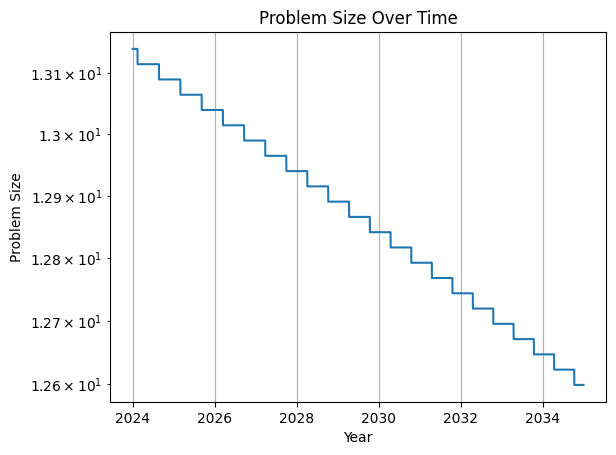

In [44]:
qea.plot_quantum_econ_advantage(classical_runtime=classical_runtime, quantum_runtime=quantum_runtime, stop_year=2035)

In [45]:
econ_advantage_year = qea.econ_advantage_point(
    classical_runtime=classical_runtime, quantum_runtime=quantum_runtime)
print(f"Economic advantage year for Hartree Fock: {econ_advantage_year}")


classical_runtime_func <function _lambdifygenerated at 0x7fe0c835dee0>
quantum_runtime_func <function _lambdifygenerated at 0x7fe150b453a0>
estimated_year 2035.77294921875
Economic advantage year for Hartree Fock: 2035.77294921875


In [46]:
# %%
prob_size = 100
feas_and_econ = qea.find_prob_size_intersection(
    classical_runtime=classical_runtime,
    quantum_runtime=quantum_runtime,
    problem_size=prob_size,
)
print(f"the problem size {prob_size} is feasible and economic at year {feas_and_econ}")



economic_advantage_year 2024.0006713867188
the problem size 100 is feasible and economic at year 2039.2599487304688


In [47]:
# %%
def all_properties(classical_runtime, quantum_runtime, **config):
    problem_sizes = [10, 100, 1000, 10000, 100000]
    qea_by_sizes = []
    for size in problem_sizes:
        qea_for_size = qea.find_prob_size_intersection(
            classical_runtime=classical_runtime,
            quantum_runtime=quantum_runtime,
            problem_size=size,
        )
        qea_by_sizes.append(qea_for_size)
    econ_advantge_point = qea.econ_advantage_point(
        classical_runtime=classical_runtime, quantum_runtime=quantum_runtime)
    return [*qea_by_sizes, econ_advantge_point]



In [38]:
# %%
classical_runtime = "n**3"
quantum_runtime = "n"
hf_props = all_properties(classical_runtime, quantum_runtime)
# Molar plesset
print("Molar plesset analysis")
classical_runtime = "2.553*10**7*n**5"
quantum_runtime = "2.553*10**7*n*log(n, 2)**2"
mp_props = all_properties(classical_runtime, quantum_runtime)


qea.prob_size_intersect_range = (2, 1e3)
print("Full Configuration Interaction analysis")
classical_runtime = "2.553*10**7*n**n*sqrt(2*3.1415*n)*exp(-n)"
quantum_runtime = "2.553*10**7*n**5"


fci_props = all_properties(classical_runtime, quantum_runtime)

economic_advantage_year 2074.2835083007812
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
classical_runtime_func <function _lambdifygenerated at 0x7fe0c8374ca0>
quantum_runtime_func <function _lambdifygenerated at 0x7fe150b67a60>
estimated_year 2039.07568359375
Molar plesset analysis
economic_advantage_year 2053.3550415039062
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
classical_runtime_func <function _lambdifygenerated at 0x7fe0c8374160>
quantum_runtime_func <function _lambdifygenerated at 0x7fe1004470d0>
estimated_year 2036.44091796875
Full Configuration Interaction analysis
economic_advantage_year 2083.9353637695312
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.00067

In [39]:
# %%
# turn this into pandas dataframe
all_props = [hf_props, mp_props, fci_props]
df = pd.DataFrame(
    all_props,
    columns=["10", "100", "1000", "10000", "100000", "Year of Economic Advantage"],
    index=["Hartree Fock", "Moller-Plesset 2", "Full Configuration Interaction"],
)
#only display non decimal values

df = df.round(0)
df = df.astype(int)
df
# df = df.round(0)
# df


,10,100,1000,10000,100000,Year of Economic Advantage
Hartree Fock,2074,2039,2043,2047,2051,2039
Moller-Plesset 2,2053,2039,2043,2047,2051,2036
Full Configuration Interaction,2084,2039,2043,2047,2051,2036


In [48]:
# %%
#matrix multiplication analysis
classical_runtime = "n**3"
quantum_runtime = "100*n**2"
dense_props = all_properties(classical_runtime, quantum_runtime)
# Molar plesset
print("Sparse Analysis")
classical_runtime = "n**2"
quantum_runtime = "n**(5/3)"
sparse_props = all_properties(classical_runtime, quantum_runtime)


# qea.prob_size_intersect_range = (2, 1e3)
# print("Full Configuration Interaction analysis")
# classical_runtime = "2.553*10**7*n**n*sqrt(2*3.1415*n)*exp(-n)"
# quantum_runtime = "2.553*10**7*n**5"


# fci_props = all_properties(classical_runtime, quantum_runtime)

economic_advantage_year 2139.8538208007812
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
classical_runtime_func <function _lambdifygenerated at 0x7fe0c03d0940>
quantum_runtime_func <function _lambdifygenerated at 0x7fe128b4e3a0>
estimated_year 2039.26123046875
Sparse Analysis
economic_advantage_year 2110.9533081054688
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
economic_advantage_year 2024.0006713867188
classical_runtime_func <function _lambdifygenerated at 0x7fe0c03d0940>
quantum_runtime_func <function _lambdifygenerated at 0x7fe128b4edc0>
estimated_year 2039.26123046875


In [53]:
# turn this into pandas dataframe
all_props = [dense_props, sparse_props]
df = pd.DataFrame(
    all_props,
    columns=["10", "10^2", "10^3", "10^4", "10^5", "Year of Economic Advantage"],
    index=["Dense Matrix Multiplication", "Sparse Matrix Multiplication"],
)
df = df.round(0)
df = df.astype(int)
df

,10,10^2,10^3,10^4,10^5,Year of Economic Advantage
Dense Matrix Multiplication,2140,2039,2043,2047,2051,2039
Sparse Matrix Multiplication,2111,2039,2043,2047,2051,2039


,10,100,1000,10000,100000,Year of Economic Advantage
Dense Matrix Multiplication,2139.853821,2039.259949,2043.124451,2046.988953,2050.853455,2039.26123
Sparse Matrix Multiplication,2110.953308,2039.259949,2043.124451,2046.988953,2050.853455,2039.26123
